# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import openweathermapy.core as owm
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [93]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [94]:
settings = {"units": "imperial", "appid": api_key}
i = 1
n = 1
s = ["name", "clouds.all", "sys.country", "dt", "main.humidity","coord.lat", "coord.lon","main.temp_max", "wind.speed"]
d = []
print ("Beginning Data Retrieval\n-----------------------------")
for city in cities:
    
    try:
        current_weather = owm.get_current(city, **settings)
        data = current_weather(*s)
        d.append(data)
        print(f"Processing Record {i} of Set {n} | {city}")
        i += 1
    except:
        print ("City not found. Skipping...")
   
    if i == 50:
        time.sleep(50)
        n += 1
        i = 0      
print ("-----------------------------\nData Retrieval Complete\n -----------------------------")

data_dict = {"City": [i[0] for i in d]  , "Cloudiness": [i[1] for i in d], "Country": [i[2] for i in d], 
             "Date": [datetime.fromtimestamp(int(i[3])).strftime('%m/%d/%Y') for i in d], "Humidity": [i[4] for i in d],
             "Lat": [i[5] for i in d], "Lng": [i[6] for i in d],
             "Max Temp": [i[7] for i in d], "Wind Speed": [i[8] for i in d]}


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | powell river
Processing Record 3 of Set 1 | khash
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | caravelas
Processing Record 6 of Set 1 | faya
Processing Record 7 of Set 1 | moindou
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | hobart
City not found. Skipping...
Processing Record 10 of Set 1 | victoria
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | anyama
Processing Record 14 of Set 1 | mahibadhoo
Processing Record 15 of Set 1 | chumikan
Processing Record 16 of Set 1 | mount gambier
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | nanzhang
Processing Record 20 of Set 1 | trincomalee
Processing Record 21 of Set 1 | torbay
Processing Record 22 of Set 1 | albany
Processing Record 2

Processing Record 38 of Set 4 | sinnamary
Processing Record 39 of Set 4 | khani
Processing Record 40 of Set 4 | ayagoz
Processing Record 41 of Set 4 | egvekinot
Processing Record 42 of Set 4 | taguatinga
Processing Record 43 of Set 4 | meadow lake
Processing Record 44 of Set 4 | chernyshevskiy
Processing Record 45 of Set 4 | sawang daen din
Processing Record 46 of Set 4 | saint-philippe
Processing Record 47 of Set 4 | cherskiy
Processing Record 48 of Set 4 | laguna
Processing Record 49 of Set 4 | kruisfontein
Processing Record 0 of Set 5 | taltal
Processing Record 1 of Set 5 | cayenne
Processing Record 2 of Set 5 | saint-augustin
Processing Record 3 of Set 5 | kahului
Processing Record 4 of Set 5 | las palmas
City not found. Skipping...
Processing Record 5 of Set 5 | beringovskiy
Processing Record 6 of Set 5 | hualmay
Processing Record 7 of Set 5 | kulebaki
Processing Record 8 of Set 5 | saldanha
Processing Record 9 of Set 5 | ornskoldsvik
Processing Record 10 of Set 5 | ulladulla
Proc

Processing Record 24 of Set 8 | yebaishou
Processing Record 25 of Set 8 | pevek
City not found. Skipping...
Processing Record 26 of Set 8 | kokopo
Processing Record 27 of Set 8 | birao
Processing Record 28 of Set 8 | ejby
Processing Record 29 of Set 8 | port hardy
Processing Record 30 of Set 8 | kununurra
Processing Record 31 of Set 8 | lagos
Processing Record 32 of Set 8 | tara
Processing Record 33 of Set 8 | batagay-alyta
Processing Record 34 of Set 8 | phonhong
Processing Record 35 of Set 8 | walvis bay
Processing Record 36 of Set 8 | sundumbili
Processing Record 37 of Set 8 | thunder bay
Processing Record 38 of Set 8 | gunnedah
City not found. Skipping...
Processing Record 39 of Set 8 | riyadh
Processing Record 40 of Set 8 | mwinilunga
Processing Record 41 of Set 8 | tiksi
Processing Record 42 of Set 8 | mabaruma
City not found. Skipping...
Processing Record 43 of Set 8 | isangel
Processing Record 44 of Set 8 | statesboro
Processing Record 45 of Set 8 | emerald
Processing Record 46

Processing Record 4 of Set 12 | ust-kan
Processing Record 5 of Set 12 | drayton valley
Processing Record 6 of Set 12 | meulaboh
Processing Record 7 of Set 12 | slave lake
Processing Record 8 of Set 12 | rosarito
Processing Record 9 of Set 12 | ostersund
Processing Record 10 of Set 12 | altamira
Processing Record 11 of Set 12 | okha
Processing Record 12 of Set 12 | praia da vitoria
-----------------------------
Data Retrieval Complete
 -----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [95]:
weather_df =  pd.DataFrame(data_dict)
weather_df.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [96]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Georgetown,40,GY,09/29/2019,74,6.80,-58.16,84.20,16.11
1,Powell River,75,CA,09/29/2019,35,49.84,-124.52,62.01,3.36
2,Khash,8,IR,09/29/2019,39,28.22,61.21,59.10,0.87
3,Rikitea,91,PF,09/29/2019,73,-23.12,-134.97,70.71,7.78
4,Caravelas,90,BR,09/29/2019,89,-17.73,-39.27,72.99,11.56


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

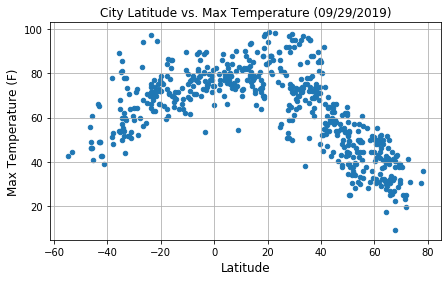

In [97]:
# Plotting Max Temperature vs Latitude
lat_temp_df = weather_df[["Lat", "Max Temp"]]
Date = weather_df["Date"].unique()[0]
multi_plot = lat_temp_df.plot.scatter(x = "Lat", y= "Max Temp", figsize=(7,4))
plt.title(f"City Latitude vs. Max Temperature ({Date})")
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Max Temperature (F)", fontsize = 12)
plt.grid()
plt.savefig('Latitude_Temperature.png')
plt.show()

#### Latitude vs. Humidity Plot

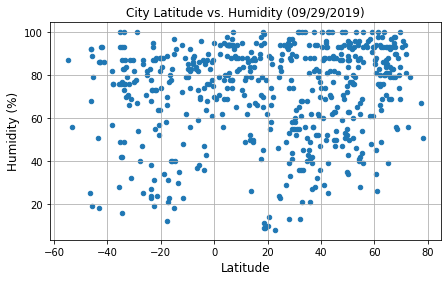

In [98]:
# Plotting Humidity vs Latitude
lat_temp_df = weather_df[["Lat", "Humidity"]]
Date = weather_df["Date"].unique()[0].replace("-","/")
multi_plot = lat_temp_df.plot.scatter(x = "Lat", y= "Humidity", figsize=(7,4))
plt.title(f"City Latitude vs. Humidity ({Date})")
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Humidity (%)", fontsize = 12)
plt.grid()
plt.savefig('Latitude_Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

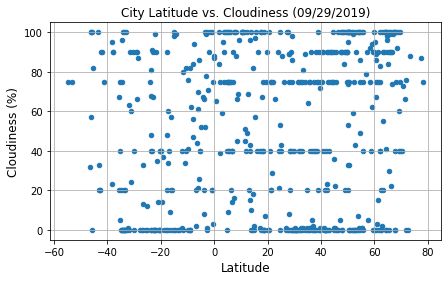

In [99]:
# Plotting Cloudiness vs Latitude
lat_temp_df = weather_df[["Lat", "Cloudiness"]]
Date = weather_df["Date"].unique()[0].replace("-","/")
multi_plot = lat_temp_df.plot.scatter(x = "Lat", y= "Cloudiness", figsize=(7,4))

plt.title(f"City Latitude vs. Cloudiness ({Date})")
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Cloudiness (%)", fontsize = 12)
plt.grid()
plt.savefig('Latitude_Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

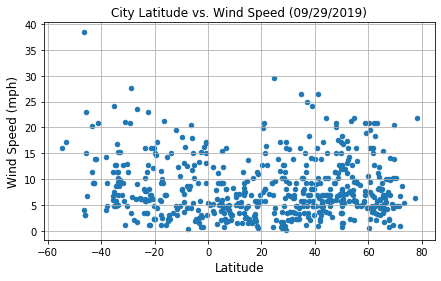

In [100]:
# Plotting Wind Speed vs Latitude
lat_temp_df = weather_df[["Lat", "Wind Speed"]]
Date = weather_df["Date"].unique()[0].replace("-","/")
multi_plot = lat_temp_df.plot.scatter(x = "Lat", y= "Wind Speed", figsize=(7,4))

plt.title(f"City Latitude vs. Wind Speed ({Date})")
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Wind Speed (mph)", fontsize = 12)
plt.grid()
plt.savefig('Latitude_WindSpeed.png')
plt.show()